## Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#Getting Tesla Stock Data from yfinance package

tesla = yf.Ticker('TSLA')

In [6]:
# 5 years of Data

df = tesla.history('5Y')

In [9]:
# Printing head of the data

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-23 00:00:00-05:00,24.000000,24.033333,23.400000,23.519333,81981000,0.0,0.0
2018-01-24 00:00:00-05:00,23.638666,23.650000,22.901333,23.059334,79312500,0.0,0.0
2018-01-25 00:00:00-05:00,23.218000,23.280001,22.426666,22.509333,101104500,0.0,0.0
2018-01-26 00:00:00-05:00,22.766666,22.933332,22.380667,22.856667,68091000,0.0,0.0
2018-01-29 00:00:00-05:00,22.656668,23.389999,22.552000,23.302000,71206500,0.0,0.0


In [10]:
# Printing tail of the data

df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-01-17 00:00:00-05:00,125.699997,131.699997,125.019997,131.490005,186477000,0.0,0.0
2023-01-18 00:00:00-05:00,136.559998,136.679993,127.010002,128.779999,195680300,0.0,0.0
2023-01-19 00:00:00-05:00,127.260002,129.990005,124.309998,127.169998,170291900,0.0,0.0
2023-01-20 00:00:00-05:00,128.679993,133.509995,127.349998,133.419998,138429900,0.0,0.0
2023-01-23 00:00:00-05:00,135.869995,145.379303,134.270004,142.490005,176639356,0.0,0.0


In [12]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03,1259.0,1259.000000
mean,133.016309,136.097168,129.603052,132.900298,1.334263e+08,0.0,0.006354
std,117.459130,120.112340,114.427449,117.271125,9.021225e+07,0.0,0.164276
min,12.073333,12.445333,11.799333,11.931333,2.940180e+07,0.0,0.000000
25%,21.078334,21.496000,20.645333,21.091666,7.608435e+07,0.0,0.000000
50%,99.388664,101.827332,96.292000,99.166000,1.032840e+08,0.0,0.000000
75%,235.556671,239.885002,231.284996,236.125000,1.578984e+08,0.0,0.000000
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08,0.0,5.000000


In [13]:
df.shape

(1259, 7)

## Data cleaning

In [14]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [22]:
len(df['Dividends'].unique())

1

In [25]:
len(df['Stock Splits'].unique())

3

In [27]:
len(df['Close'].unique())

1247

In [29]:
df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [30]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-23 00:00:00-05:00,24.000000,24.033333,23.400000,23.519333,81981000
2018-01-24 00:00:00-05:00,23.638666,23.650000,22.901333,23.059334,79312500
2018-01-25 00:00:00-05:00,23.218000,23.280001,22.426666,22.509333,101104500
2018-01-26 00:00:00-05:00,22.766666,22.933332,22.380667,22.856667,68091000
2018-01-29 00:00:00-05:00,22.656668,23.389999,22.552000,23.302000,71206500


## Overview of closing price before calculating DMA's

Text(0.5, 1.0, 'Closing Price')

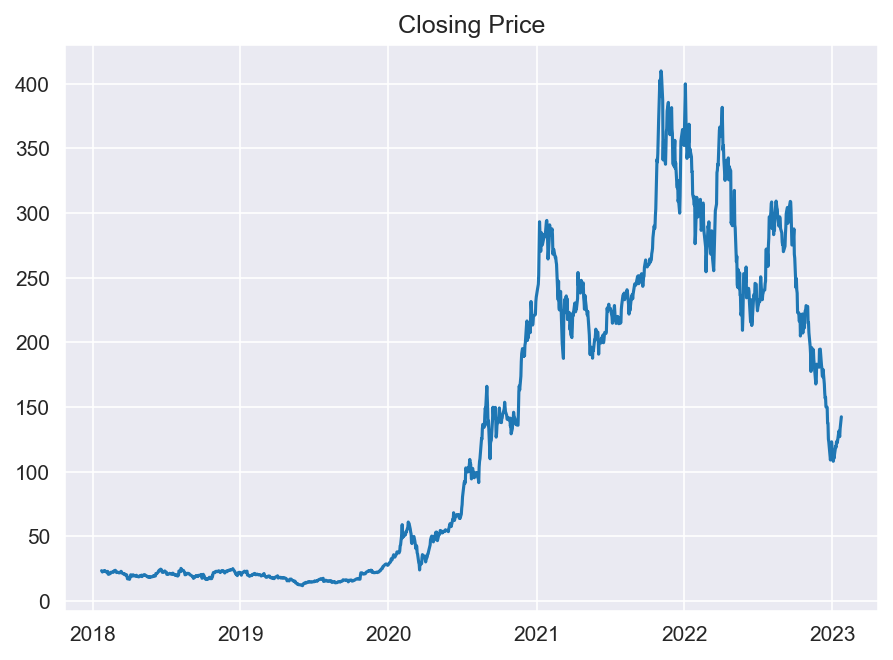

In [31]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,5), dpi=150)
plt.plot(df['Close'])
plt.title("Closing Price")

## Creating 50DMA and 200DMA

In [32]:
#calculating 50DMA

df["fiftyDMA"] = df['Close'].rolling(50).mean()

In [33]:
#calculating 200DMA

df["thundDMA"] = df['Close'].rolling(200).mean()

In [34]:
df.head()

,Open,High,Low,Close,Volume,fiftyDMA,thundDMA
Date,,,,,,,
2018-01-23 00:00:00-05:00,24.000000,24.033333,23.400000,23.519333,81981000,NaN,NaN
2018-01-24 00:00:00-05:00,23.638666,23.650000,22.901333,23.059334,79312500,NaN,NaN
2018-01-25 00:00:00-05:00,23.218000,23.280001,22.426666,22.509333,101104500,NaN,NaN
2018-01-26 00:00:00-05:00,22.766666,22.933332,22.380667,22.856667,68091000,NaN,NaN
2018-01-29 00:00:00-05:00,22.656668,23.389999,22.552000,23.302000,71206500,NaN,NaN


In [35]:
df.tail()

,Open,High,Low,Close,Volume,fiftyDMA,thundDMA
Date,,,,,,,
2023-01-17 00:00:00-05:00,125.699997,131.699997,125.019997,131.490005,186477000,159.4038,241.345117
2023-01-18 00:00:00-05:00,136.559998,136.679993,127.010002,128.779999,195680300,157.6732,240.193017
2023-01-19 00:00:00-05:00,127.260002,129.990005,124.309998,127.169998,170291900,156.0672,239.021217
2023-01-20 00:00:00-05:00,128.679993,133.509995,127.349998,133.419998,138429900,154.7940,237.779234
2023-01-23 00:00:00-05:00,135.869995,145.379303,134.270004,142.490005,176639356,153.8178,236.672917


## Plotting Closing price vs 50DMA vs 200DMA

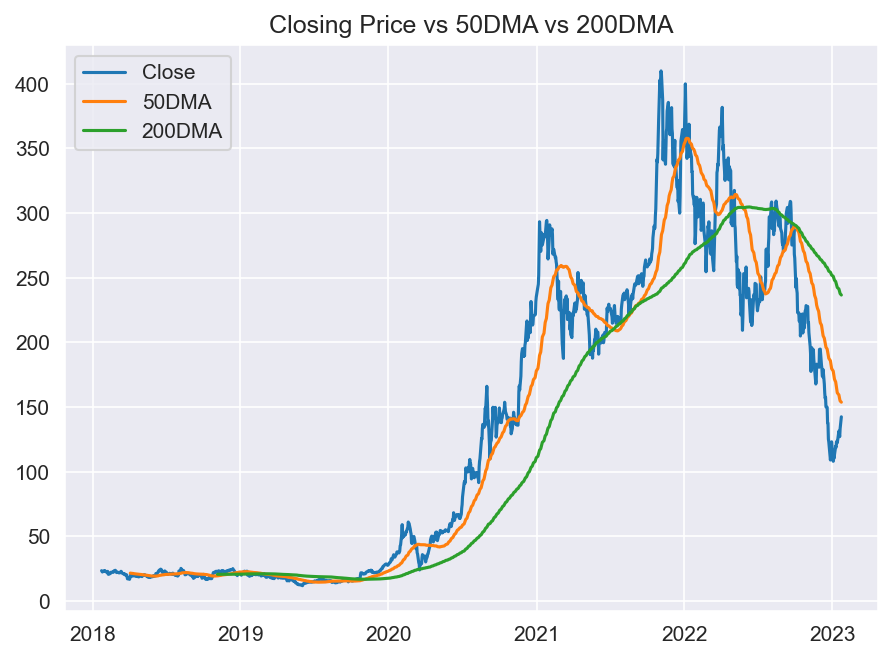

In [37]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,5), dpi=150)
plt.plot(df['Close'], label='Close')
plt.plot(df['fiftyDMA'], label='50DMA')
plt.plot(df['thundDMA'], label='200DMA')
plt.title("Closing Price vs 50DMA vs 200DMA")
plt.legend()


### Key takeaways from the above graph:

1. 50DMA and 200DMA are fairly good indicators of how the stock is moving;
2. if the closing price is above the 50DMA or 200DMA, it usually indicates an uptrend or bullish movement;
3. if the closing price is below the 50DMA or 200DMA, it usually indicates a downtredn or bearish movement;
4. Every point where 50DMA and 200DMA intersect, it is an indication of market reversion (High -> Low or Low -> High)
5. The huge dip at the March 2020, indicates the Covid 19 market crash

## Exploratory Data Analysis

<AxesSubplot:>

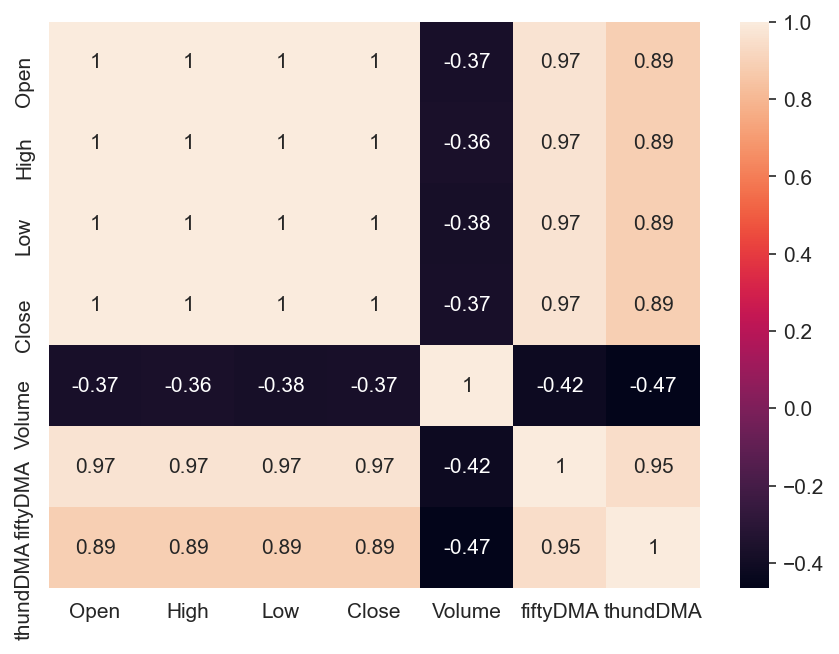

In [40]:
# Analysis of the correlation between each variables

plt.figure(figsize=(7,5), dpi=150)
sns.heatmap(df.corr(), annot=True)

### Key takeaways from the above heatmap:

1. Closing price has very high correlation with almost all the variables except the volume
2. There is strong multi collinearity between as well (eg.: Close vs 50DMA and Close vs 200DMA)

### Plotting distplot of 50DMA

<AxesSubplot:title={'center':'Distplot of 50DMA'}, xlabel='fiftyDMA', ylabel='Density'>

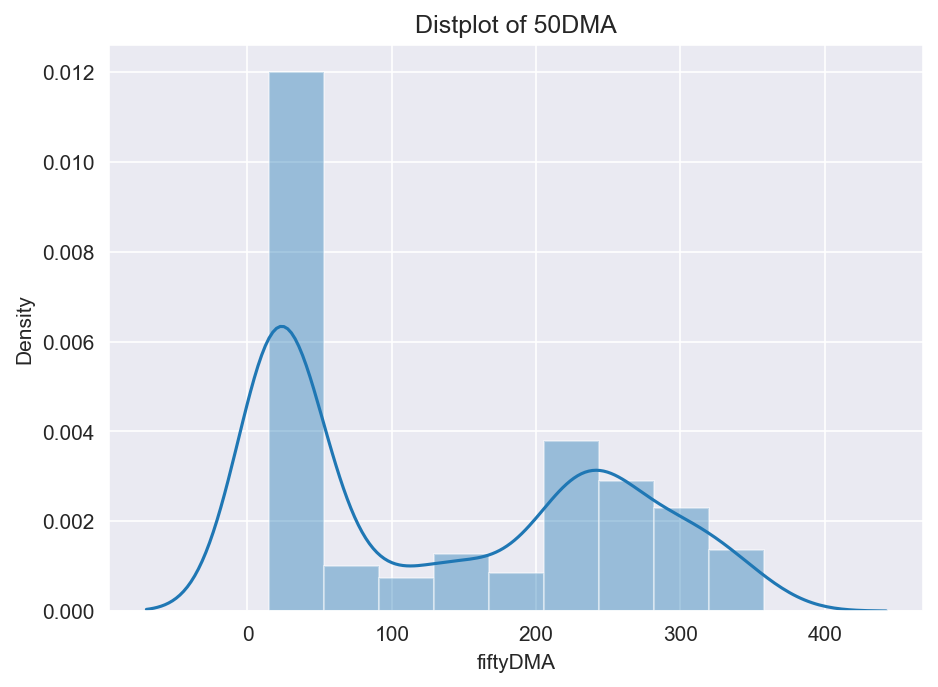

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,5), dpi=150)
plt.title('Distplot of 50DMA')
sns.distplot(df['fiftyDMA'])

### Plotting distplot of closing price

<AxesSubplot:title={'center':'Distplot of the Closing Price'}, xlabel='Close', ylabel='Density'>

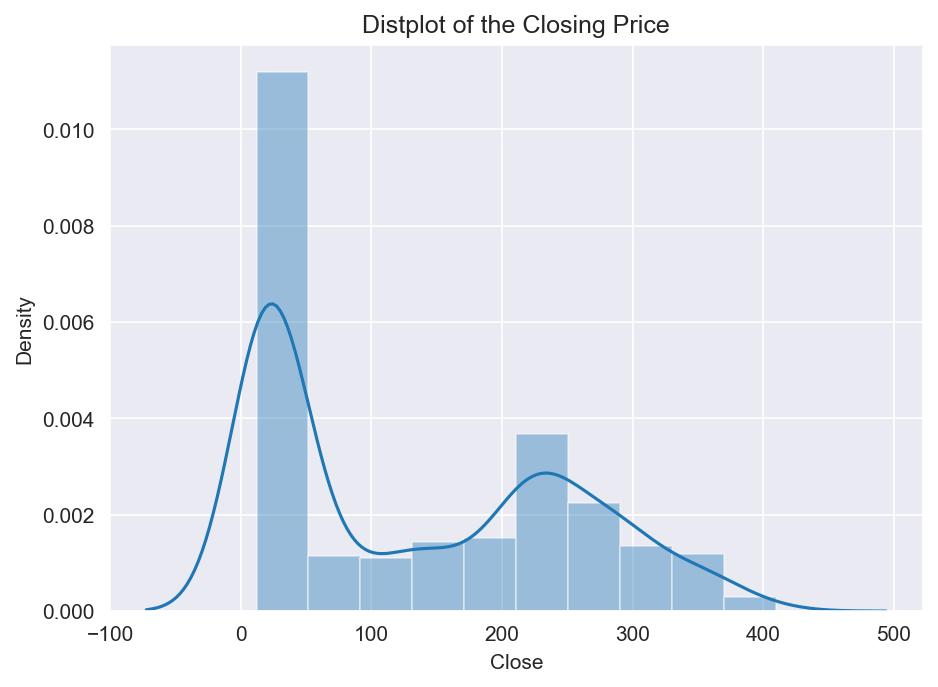

In [43]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,5), dpi=150)
plt.title('Distplot of the Closing Price')
sns.distplot(df['Close'])

### Key takeaways from above distplots

1. Both graphs shows that 50DMA and Closing Price follow the same distribuition

## Finding possible futuristic movement of the stock

In [44]:
model = smf.ols(formula = 'Close ~ fiftyDMA', data=df)
model = model.fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                 1.849e+04
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        22:22:18   Log-Likelihood:                -5794.2
No. Observations:                1210   AIC:                         1.159e+04
Df Residuals:                    1208   BIC:                         1.160e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7445      1.279      4.490      0.000       3.234       8.255
fiftyDMA       0.9751      0.007    135.970      0.000       0.961       0.989
==============================================================================
Omnibus:                      120.086   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.290
Skew:                           0.528   Prob(JB):                     1.40e-71
Kurtosis:                       5.315   Cond. No.                         273.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Inferences from the summary:

1. Good r2 scores and coef
2. Since they are very highly correlated (~ 1), it isn't wise to fit the model based on the parameters in real life

Text(0, 0.5, 'Price')

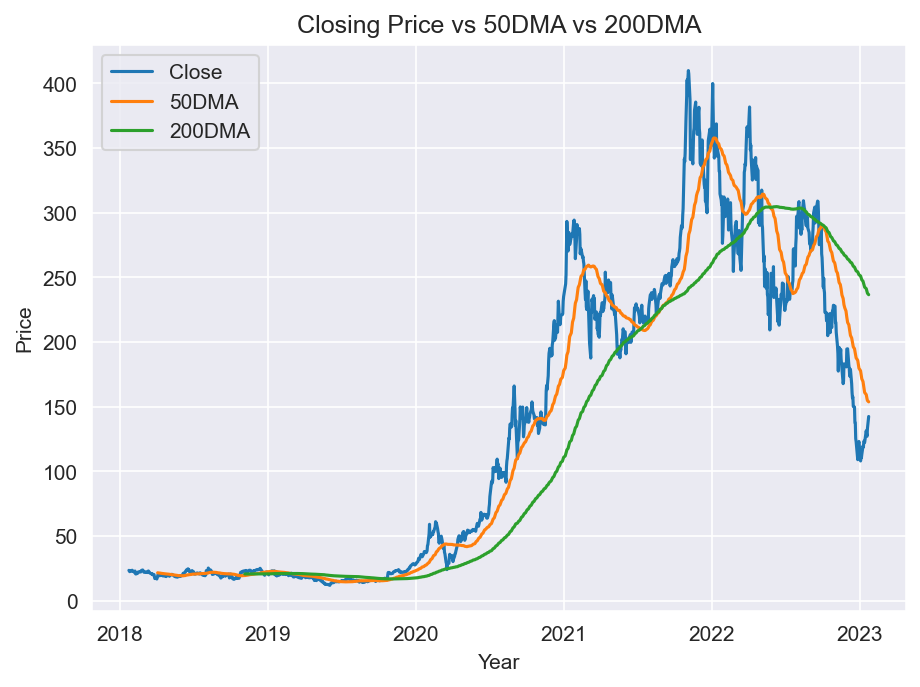

In [48]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,5), dpi=150)
plt.plot(df['Close'], label='Close')
plt.plot(df['fiftyDMA'], label='50DMA')
plt.plot(df['thundDMA'], label='200DMA')
plt.title('Closing Price vs 50DMA vs 200DMA')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price')

 
### Warning: 
Any trading decision should not be based soly on this type of prediction, however it can be used as an indicator or one of the tools that one could use for technical analysis for stocks trading.

This was an exemple of how we can use statsmodels and DMA to find potential futuristic movement of the stock. 
